<a href="https://colab.research.google.com/github/AryanilAD/Corporate-Training-Mini_Projects/blob/main/RNN_RG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

In [129]:
df=pd.read_csv("/content/insurance.csv")
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<Axes: >

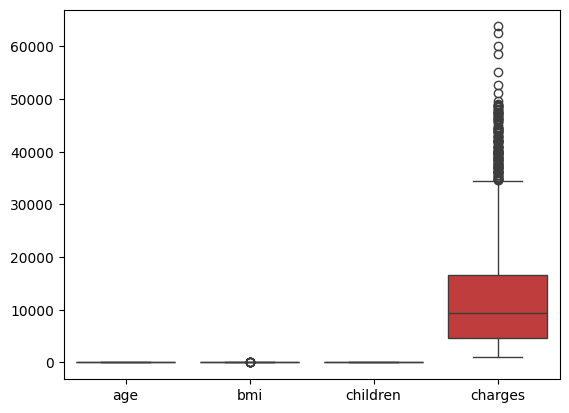

In [130]:
import seaborn as sns

# Visualize outliers using box plots
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])

In [131]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values
percentage_missing = (missing_values / len(df)) * 100

print("Missing Values:")
print(pd.concat([missing_values, percentage_missing], axis=1, keys=['Total', 'Percentage']))

Missing Values:
          Total  Percentage
age           0         0.0
sex           0         0.0
bmi           0         0.0
children      0         0.0
smoker        0         0.0
region        0         0.0
charges       0         0.0


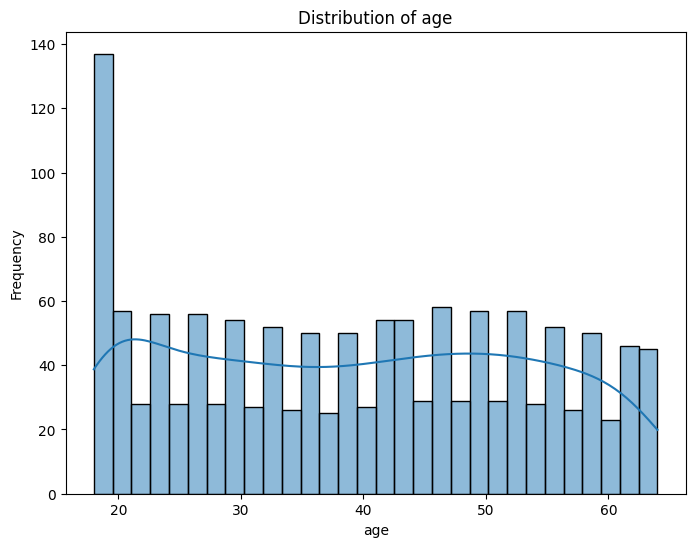

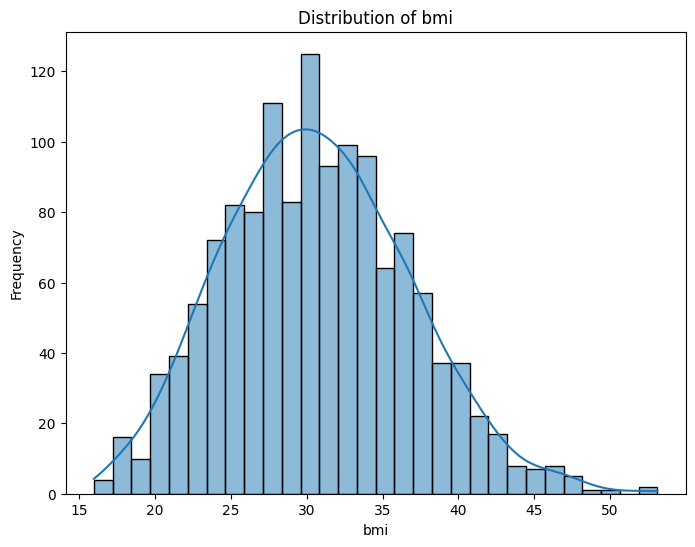

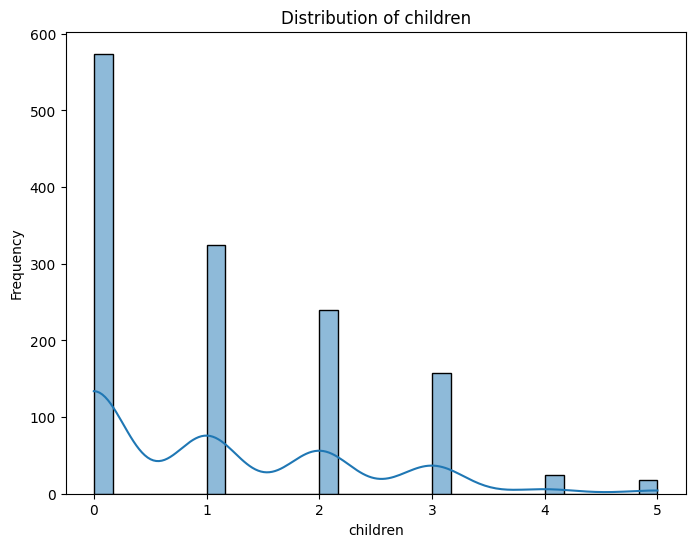

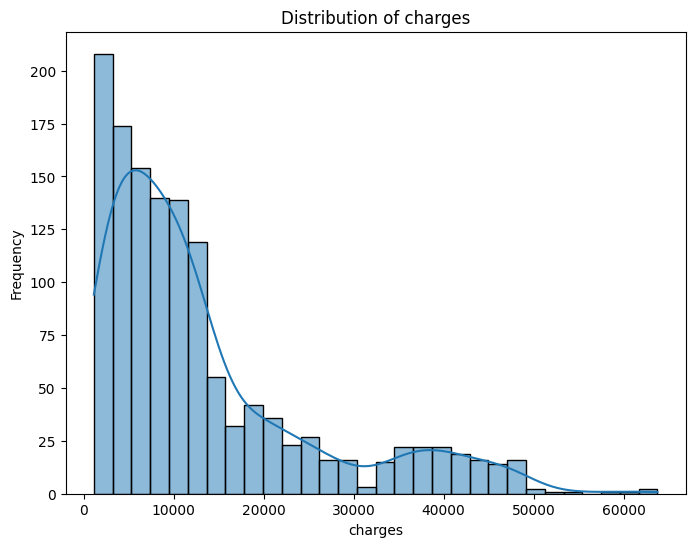

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'charges']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

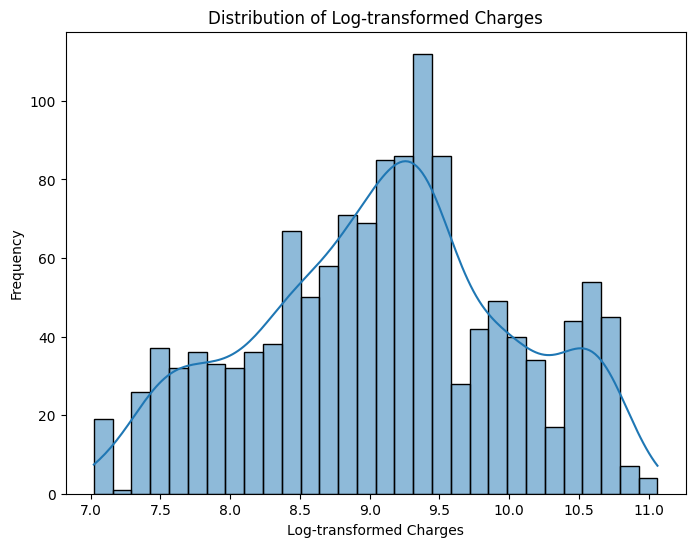

In [133]:
import numpy as np

# Log transformation of the charges column
df['charges_log'] = np.log(df['charges'])

# Plot the histogram of the log-transformed charges
plt.figure(figsize=(8, 6))
sns.histplot(df['charges_log'], bins=30, kde=True)
plt.title('Distribution of Log-transformed Charges')
plt.xlabel('Log-transformed Charges')
plt.ylabel('Frequency')
plt.show()


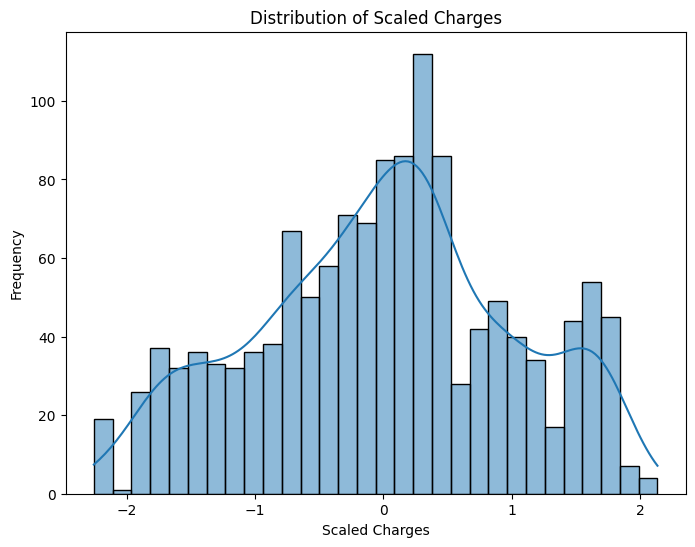

In [134]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the log-transformed charges column and transform the data
df['charges_scaled'] = scaler.fit_transform(df[['charges_log']])

# Plot the histogram of the scaled charges
plt.figure(figsize=(8, 6))
sns.histplot(df['charges_scaled'], bins=30, kde=True)
plt.title('Distribution of Scaled Charges')
plt.xlabel('Scaled Charges')
plt.ylabel('Frequency')
plt.show()

In [135]:
# Check the column names
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_log', 'charges_scaled'],
      dtype='object')


In [136]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [137]:
# Select features and target variable
X = df_encoded.drop(['charges', 'charges_log', 'charges_scaled'], axis=1)
y = df['charges_scaled']

In [138]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [139]:
# Convert X_train and X_test to numpy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape X_train to have a third dimension for time steps
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)

# Reshape X_test similarly
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Update the input shape in the model
model = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_train_array.shape[1], 1)),
    Dropout(0.2),  # Dropout layer to reduce overfitting
    SimpleRNN(32, activation='tanh', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(16, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Linear output layer for regression
])

In [140]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
34/34 [==============================] - 4s 24ms/step - loss: 1.0176 - val_loss: 0.9703
Epoch 2/10
34/34 [==============================] - 0s 12ms/step - loss: 0.8732 - val_loss: 0.8004
Epoch 3/10
34/34 [==============================] - 0s 11ms/step - loss: 0.7996 - val_loss: 0.7101
Epoch 4/10
34/34 [==============================] - 0s 12ms/step - loss: 0.7220 - val_loss: 0.5396
Epoch 5/10
34/34 [==============================] - 0s 10ms/step - loss: 0.6132 - val_loss: 0.3934
Epoch 6/10
34/34 [==============================] - 0s 11ms/step - loss: 0.4715 - val_loss: 0.2526
Epoch 7/10
34/34 [==============================] - 0s 11ms/step - loss: 0.3995 - val_loss: 0.2941
Epoch 8/10
34/34 [==============================] - 0s 10ms/step - loss: 0.3744 - val_loss: 0.2148
Epoch 9/10
34/34 [==============================] - 0s 11ms/step - loss: 0.3751 - val_loss: 0.2005
Epoch 10/10
34/34 [==============================] - 0s 10ms/step - loss: 0.3181 - val_loss: 0.2058


In [141]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

9/9 [==============================] - 0s 3ms/step - loss: 0.2058
Mean Squared Error: 0.2058068811893463


9/9 [==============================] - 0s 3ms/step


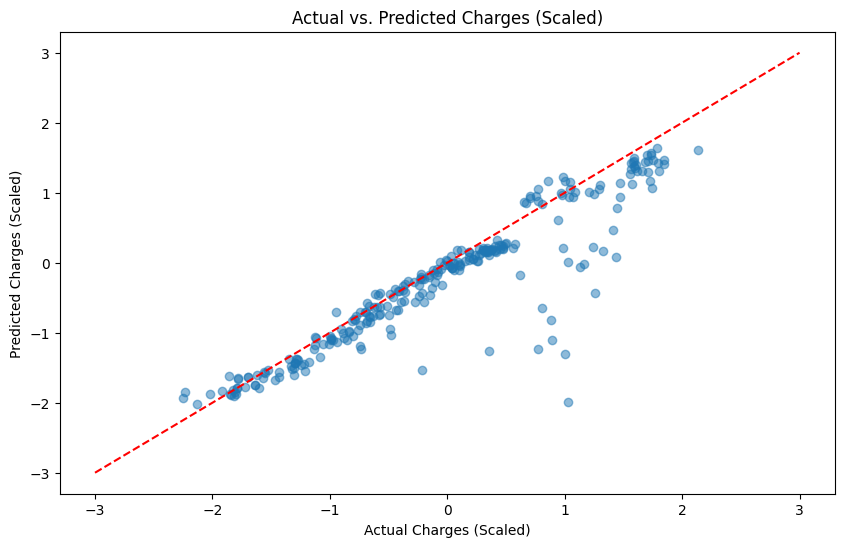

In [142]:
# Predict the charges_scaled values for X_test
y_pred = model.predict(X_test_reshaped)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([-3, 3], [-3, 3], '--', color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Charges (Scaled)')
plt.xlabel('Actual Charges (Scaled)')
plt.ylabel('Predicted Charges (Scaled)')
plt.show()

<ipython-input-143-9a3b09dd7e2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


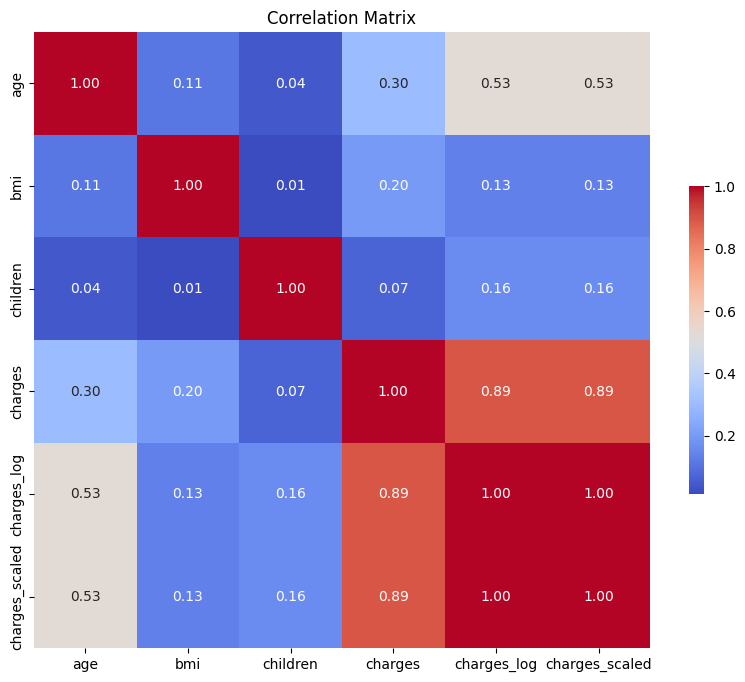

In [143]:
corr = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix')
plt.show()